In [1]:
%cd ..
from src.utils import *
from src.algos import *

e:\coding\essa-tsp-metaheuristics


## Data Loading

In [2]:
distances = load_data('data\Dane_TSP_127.xlsx')

## Settings - One sample

In [3]:
INIT_POP_SIZE = 250
POP_SIZE = 500
NO_GENERATIONS = 5
SELECTION_METHOD = "roulette"
CROSSOVER_RATE = .9
ELITE_SIZE = None
TOURNAMENT_SIZE = 4
MUTATION_RATE = .15
NEIGH_TYPE = "simple"
RANDOM_STATE = None
VERBOSE = True

In [4]:
ga = GeneticAlgorithm(
    init_pop_size=INIT_POP_SIZE,
    pop_size=POP_SIZE,
    no_generations=NO_GENERATIONS,
    selection_method=SELECTION_METHOD,
    crossover_rate=CROSSOVER_RATE,
    elite_size=ELITE_SIZE,
    tournament_size=TOURNAMENT_SIZE,
    mutation_rate=MUTATION_RATE,
    neigh_type=NEIGH_TYPE,
    random_state=RANDOM_STATE,
    verbose=VERBOSE,
)
result = ga.solve(distances)
result

Initial population: Individual(path: 101...2, distance: 576700.34)
Generation 0: Individual(path: 101...2, distance: 576700.34)
Generation 1: Individual(path: 45...99, distance: 570011.61)
Generation 2: Individual(path: 71...116, distance: 557768.64)
Generation 3: Individual(path: 71...116, distance: 558293.70)
Generation 4: Individual(path: 3...116, distance: 556303.13)
Final population: Individual(path: 3...116, distance: 556303.13)


best distance: 556303.1343669876
algorithm: GENETIC ALGORITHM
solving time: 8.239 s
history: [inf, 576700.3379034966, 570011.6137479836, 557768.6416261914, 558293.698323881, 556303.1343669876]

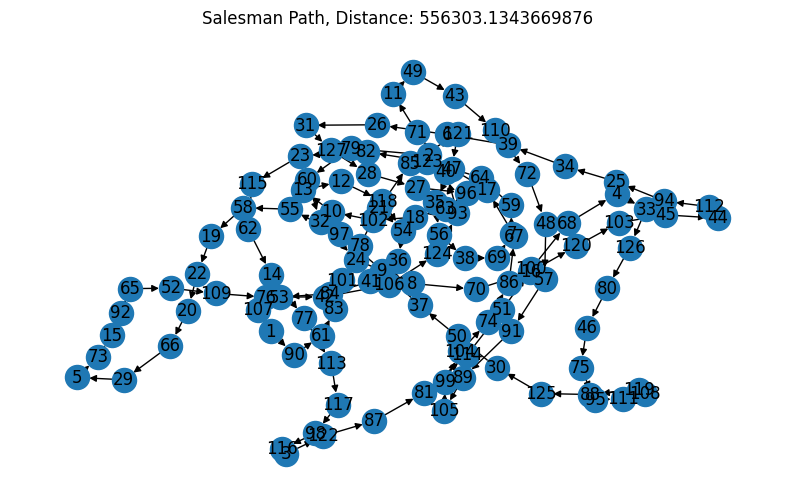

In [5]:
# Example of plotting the path
pp = PathPlotter()
pp.plot(result)

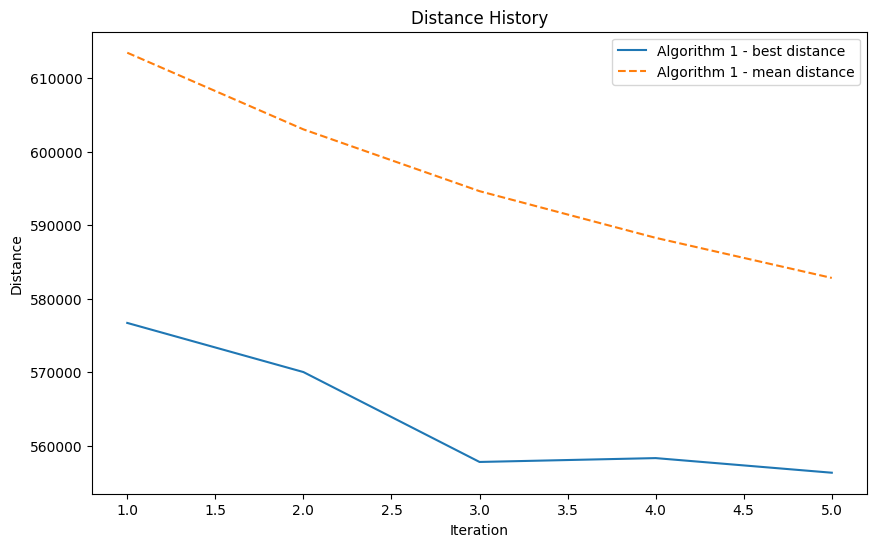

In [6]:
dhp = DistanceHistoryPlotter()
dhp.plot([result])

# Comparing multiple parameters

### STEP I - Make a list from the compared parameter

In [7]:
INIT_POP_SIZE = 250
POP_SIZE = 500
NO_GENERATIONS = 20 
SELECTION_METHOD = ["tournament", "elitism", "roulette"] # in this case, we will compare 3 different values of SELECTION_METHOD
CROSSOVER_RATE = .9
ELITE_SIZE = None
TOURNAMENT_SIZE = 5
MUTATION_RATE = .15
NEIGH_TYPE = "simple"
RANDOM_STATE = None
VERBOSE = False

### STEP II - Run Models

In [8]:
results = []
for benchmarking_parameter in SELECTION_METHOD: #replace SELECTION_METHOD with any other parameter you want to compare
    ga = GeneticAlgorithm(
        init_pop_size=INIT_POP_SIZE,
        pop_size=POP_SIZE,
        no_generations=NO_GENERATIONS,
        selection_method=benchmarking_parameter,  # I'am comparing different values of SELECTION_METHOD, but you can compare any other parameter
        crossover_rate=CROSSOVER_RATE,
        elite_size=ELITE_SIZE,
        tournament_size=TOURNAMENT_SIZE,
        mutation_rate=MUTATION_RATE,
        neigh_type=NEIGH_TYPE,
        random_state=RANDOM_STATE,
        verbose=VERBOSE,
    )
    some_result = ga.solve(distances)
    results.append(some_result) # Results are stored in a list

Initial population: Individual(path: 105...51, distance: 584115.25)
Final population: Individual(path: 56...78, distance: 425017.11)
Initial population: Individual(path: 97...31, distance: 571119.34)
Final population: Individual(path: 41...93, distance: 453514.46)
Initial population: Individual(path: 48...115, distance: 580123.22)
Final population: Individual(path: 62...107, distance: 483224.06)


STEP III - Plots

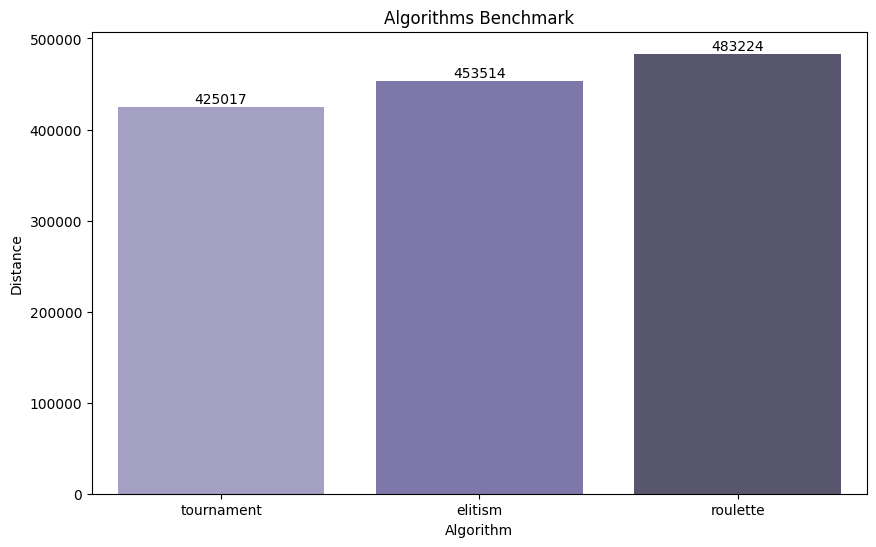

In [9]:
bp = BenchmarkPlotter()
bp.plot(results, labels=SELECTION_METHOD, palette="Purples_d") # I'am comparing different values of SELECTION_METHOD, but you can compare any other parameter

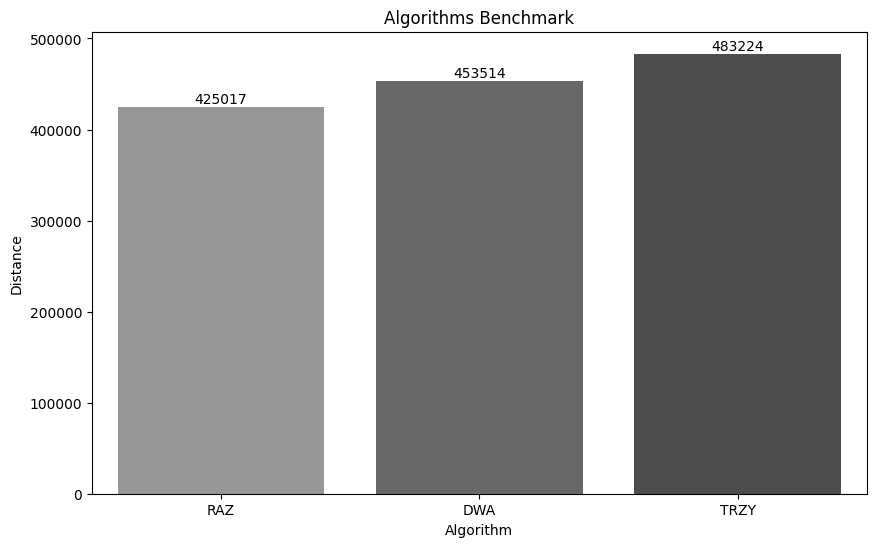

In [10]:
bp.plot(
        results, labels=["RAZ", "DWA", "TRZY"], palette="Greys_d"
    )  # Reds_d, Blues_d, Greens_d, Purples_d, Oranges_d, Greys_d

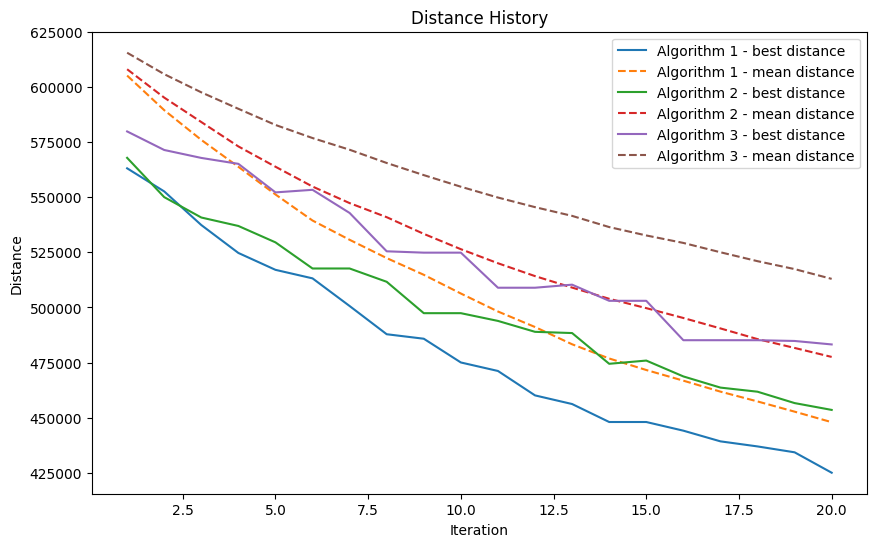

In [11]:
dhp = DistanceHistoryPlotter()
dhp.plot(results)

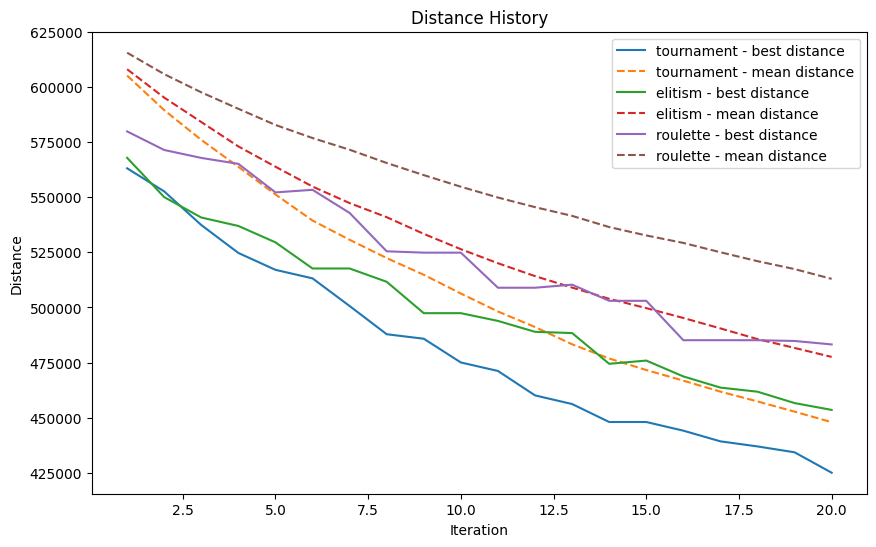

In [12]:
dhp = DistanceHistoryPlotter()
dhp.plot(results, labels=SELECTION_METHOD)

# Parallel approach

In [13]:
from joblib import Parallel, delayed

### STEP I 

In [ ]:
INIT_POP_SIZE = 250
POP_SIZE = 500
NO_GENERATIONS = 20 
SELECTION_METHOD = ["tournament", "elitism", "roulette"] # in this case, we will compare 3 different values of SELECTION_METHOD
CROSSOVER_RATE = .9
ELITE_SIZE = None
TOURNAMENT_SIZE = 5
MUTATION_RATE = .15
NEIGH_TYPE = "simple"
RANDOM_STATE = None
VERBOSE = False

### STEP II

In [14]:
def solver(distances, **kwargs):
    """Solver function for parallel processing"""
    return GeneticAlgorithm(**kwargs).solve(distances)

In [15]:
parallel_results = Parallel(n_jobs=-1)(delayed(solver)(
    distances,
    init_pop_size=INIT_POP_SIZE,
    pop_size=POP_SIZE,
    no_generations=NO_GENERATIONS,
    selection_method=benchmarking_parameter,  # I'am comparing different values of SELECTION_METHOD, but you can compare any other parameter
    crossover_rate=CROSSOVER_RATE,
    elite_size=ELITE_SIZE,
    tournament_size=TOURNAMENT_SIZE,
    mutation_rate=MUTATION_RATE,
    neigh_type=NEIGH_TYPE,
    random_state=RANDOM_STATE,
    verbose=VERBOSE,) for benchmarking_parameter in SELECTION_METHOD)

### STEP III - Plots

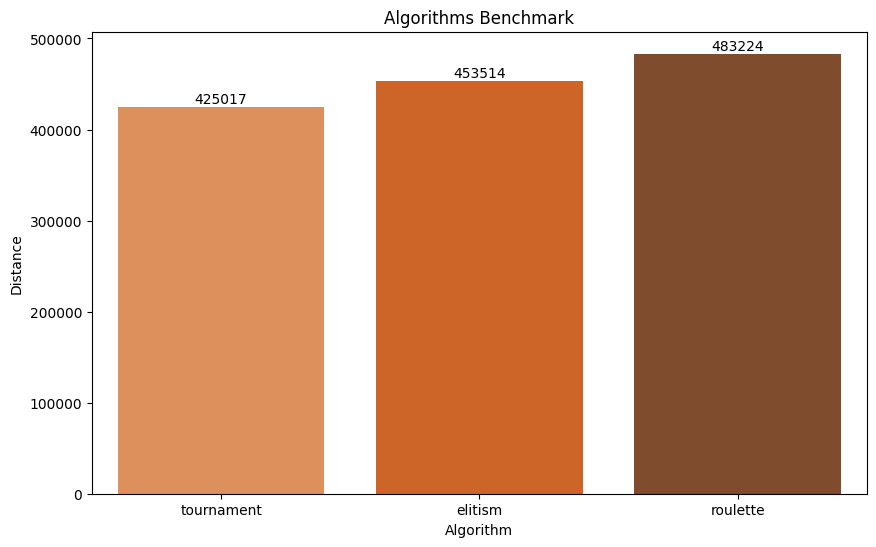

In [16]:
bp.plot(
        results, labels=SELECTION_METHOD, palette="Oranges_d"
    )  # Reds_d, Blues_d, Greens_d, Purples_d, Oranges_d, Greys_d

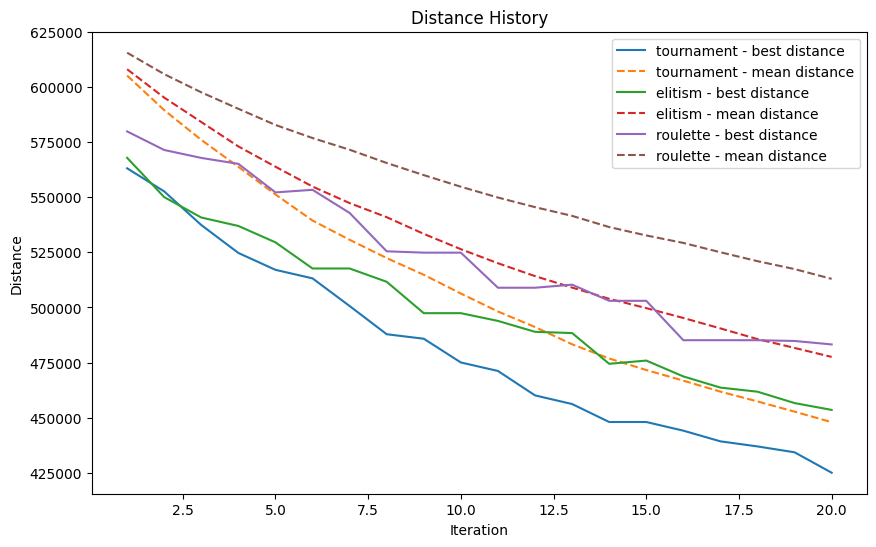

In [17]:
dhp = DistanceHistoryPlotter()
dhp.plot(results, labels=SELECTION_METHOD)